<a href="https://colab.research.google.com/github/enigma6174/tensorflow-learn/blob/develop/regression/medical_cost_regression_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [2]:
# load the dataset
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# make a column transformer to pre-process the data accordingly
column_transformer = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

In [8]:
# break the dataset into X and y
X = df.drop('charges', axis=1)
y = df['charges']

# build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [9]:
# fit the column transformer to the train data
column_transformer.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [11]:
# transform the train and test data with normalization and one hot encoding
X_train_normal = column_transformer.transform(X_train)
X_test_normal = column_transformer.transform(X_test)

In [14]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [22]:
# build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['mae'])

# train the model
history = model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 3ms/step - loss: 13321.1797 - mae: 13321.1797
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 10395.4883 - mae: 10395.4883
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 7532.6162 - mae: 7532.6162
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 6219.3647 - mae: 6219.3647
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 4107.0308 - mae: 4107.0308
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 3486.8289 - mae: 3486.8289
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 3325.9146 - mae: 3325.9146
Epoch 8/50
34/34 [==============================] - 0s 4ms/step - loss: 3264.7380 - mae: 3264.7380
Epoch 9/50
34/34 [==============================] - 0s 4ms/step - loss: 3258.9019 - mae: 3258.9019
Epoch 10/50
34/34 [==============================] - 0s 4ms/step - loss: 3261.2703 - mae: 3261.2703
Epoch

In [23]:
# evaluate the model
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1836.2808 - mae: 1836.2808


[1836.28076171875, 1836.28076171875]

Text(0, 0.5, 'loss')

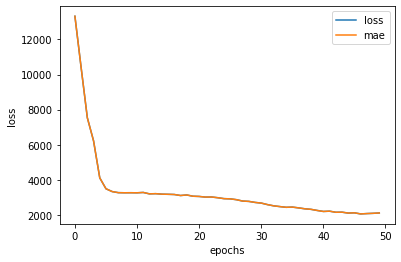

In [24]:
# plot the training curve
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')